In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
from sklearn.datasets import load_iris  # irisデータセットをロード
from sklearn.cluster import KMeans 
from sentence_transformers import SentenceTransformer
from sentence_transformers import models

/home/kontani0930/.pyenv/versions/3.7.11/envs/dining/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# jsonファイルのロード
# load JSON 20newsgroup data
with open("newsgroups.json") as fd:
    data = json.load(fd)
# content, target(=class ID), target_name(=newsgroup name)
content = data['content']
target = data['target']
target_names = data['target_names']
# get dictionary values for content, target, and target_names
content_value = content.values()
target_value = target.values()
target_name_value = target_names.values()
# extract lists for content, target, and target_names
content_value_list = list(content_value) # メッセージテキスト本体
target_value_list = list(target_value) # メッセージのカテゴリ ID
target_namevalue_list = list(target_name_value)
num_docs = 11314 # (=len(content.keys()) 

In [4]:
transformer=models.Transformer("cl-tohoku/bert-base-japanese-whole-word-masking")
pooling = models.Pooling(transformer.get_word_embedding_dimension(), pooling_mode_mean_tokens=True, pooling_mode_cls_token=False, pooling_mode_max_tokens=False)
model = SentenceTransformer(modules=[transformer, pooling])

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
sentences = ['吾輩は猫である',  '本日は晴天なり']
embeddings = model.encode(sentences)

In [6]:
embeddings=model.encode(content_value_list)

In [7]:
type(embeddings[0])

numpy.ndarray

In [8]:
df=pd.DataFrame(embeddings)
label=pd.Series(data=target_value_list)

In [9]:
#クラスタ数20でk-meansクラスタリングを実行
kmeans_model=KMeans(n_clusters=20)
kmeans_model.fit(df.values)

KMeans(n_clusters=20)

In [10]:
#分類の実行結果を表示
kmeans_model.labels_

array([ 8,  1, 17, ...,  8, 16, 12], dtype=int32)

In [11]:
label

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Length: 11314, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X=StandardScaler().fit_transform(df)
pca=PCA(n_components=2)
pca.fit(X)
X_pc=pca.transform(X)
df_pc=pd.DataFrame(X_pc)

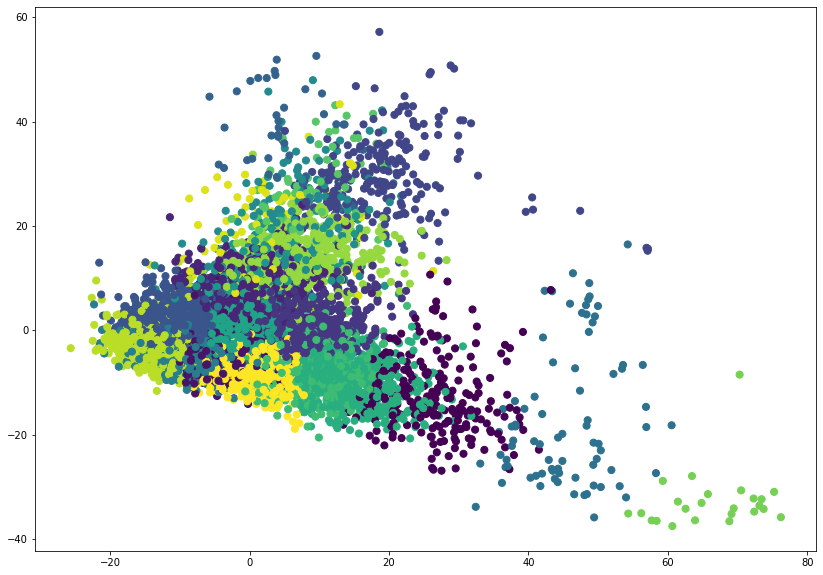

In [27]:
plt.figure(figsize=(14,10))
plt.scatter(df_pc.iloc[:,0],df_pc.iloc[:,1],c=kmeans_model.labels_,s=50)
plt.show()

In [28]:
#Cross Tableを作成
crosstab=pd.crosstab(label,kmeans_model.labels_)
crosstab

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
row_0,,,,,,,,,,,,,,,,,,,,
0,3,30,69,17,1,168,0,2,39,0,2,51,7,8,0,1,6,54,2,20
1,8,68,24,62,21,21,0,2,29,18,11,64,39,38,12,1,29,26,7,104
2,10,45,33,63,25,23,0,19,48,15,25,90,30,50,4,2,37,12,3,57
3,20,45,25,45,13,18,3,0,73,14,10,92,35,57,5,0,40,10,5,80
4,9,43,27,45,11,23,6,0,62,12,18,118,36,36,8,0,19,19,5,81
5,9,88,35,79,23,20,5,1,35,12,9,71,42,38,7,0,37,18,3,61
6,50,36,12,83,16,9,6,14,18,13,9,26,117,54,6,4,28,8,14,62
7,6,30,51,34,4,116,0,0,77,9,3,91,26,14,4,2,18,30,6,73
8,8,19,43,51,16,61,3,3,104,10,20,123,23,12,4,1,28,22,5,42


In [29]:
#Cross Tableを用いてpurity値を計算
tmp=.0
for i in range(len(crosstab.columns.values)):
    tmp+=max(crosstab.values[i])
purity=tmp/len(df.values)
print("purity: ",purity)

purity:  0.19984090507336044
